In [1]:
%matplotlib inline

from random import randint
import matplotlib
import numpy as np
import torch

# Load Pretrained Model and provide word vectors

In [2]:
# load pre-trained model
# on GPU (encoding ~1000 sentences/s, default)
model = torch.load('infersent.allnli.pickle')
# on CPU (~40 sentences/s)
# model = torch.load('infersent.allnli.pickle', map_location=lambda storage, loc: storage)


C:\Users\vbigm\Anaconda3\lib\site-packages\torch\serialization.py:286: SourceChangeWarning: source code of class 'models.BLSTMEncoder' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [3]:
# set path to word vectors from glove
GLOVE_PATH = 'D:/DataSet/NLP_GLOVE/Pre-Trained Vectors/glove840B300d/glove.840B.300d.txt'
#GLOVE_PATH = '../SemEval/glove_6B_50d.txt'
model.set_glove_path(GLOVE_PATH)

# load the K most common english words
model.build_vocab_k_words(K=100000)

Vocab size : 100000


# Load sample sentences

In [4]:
# Load example sentence from github
sentences = []
with open('samples.txt', encoding="utf-8") as f:
    for line in f:
        sentences.append(line.strip())
print(len(sentences))

9815


In [5]:
sentences = sentences[:1000]
print(len(sentences))

1000


# Encode embedding of loaded sentences

In [6]:
embeddings = model.encode(sentences, bsize=128, tokenize=False, verbose=True)
print('nb sentences encoded : {0}'.format(len(embeddings)))

Nb words kept : 13031/13210 (98.64 %)


C:\Users\vbigm\Dropbox\Course Stony Brook\17 Fall\CSE593 Independent Study\Jason\SentenceEmbedding\models.py:53: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greately increasing memory usage. To compact weights again call flatten_parameters().
  sent_output = self.enc_lstm(sent_packed)[0]  # seqlen x batch x 2*nhid


Speed : 471.52 sentences/s (gpu mode, bsize=128)
nb sentences encoded : 1000


## Try provided function to visualize the importance of each word in the encoding sentence

C:\Users\vbigm\Dropbox\Course Stony Brook\17 Fall\CSE593 Independent Study\Jason\SentenceEmbedding\models.py:238: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greately increasing memory usage. To compact weights again call flatten_parameters().
  output = self.enc_lstm(batch)[0]


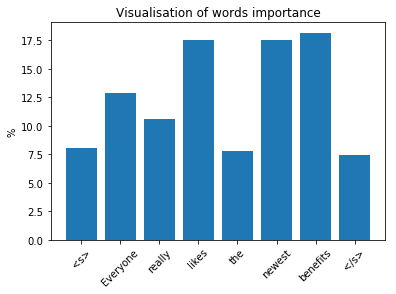

(Variable containing:
  1.0452e-01  9.5127e-02 -3.0445e-02  ...   5.4120e-02 -3.8143e-02  3.1317e-02
 [torch.cuda.FloatTensor of size 1x4096 (GPU 0)],
 array([[5, 5, 0, ..., 5, 7, 1]], dtype=int64))

In [8]:
model.visualize(sentences[0], tokenize=False)